In [40]:
clear all

In [41]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [42]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/945/945_170919/945ss2cregcdFF20spsfkf222Smith0_4_60TS.mat


In [43]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(5898, 222)

In [44]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/945/945_170919/945ss2cregcdFF20spsfkf222Smith0_4_60IC.nii


In [45]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(189, 114, 10, 222)

In [46]:
S=data.shape
S

(189, 114, 10, 222)

Z-score

In [47]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [48]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [49]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [50]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/945/945Registration/JFRC945Transformedfullpsftrimmed.nii


In [51]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [52]:
Dmaps.shape

(189, 114, 10, 222)

In [53]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [54]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [55]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [56]:
J

[12]

LO_R
ME_R
75
LO_R
ME_R
84
LO_R
ME_R
103
LO_R
LOP_R
MB_CA_R
GNG
112
LO_R
115
LO_R
ME_R
154
LO_R
ME_R
157
lobula


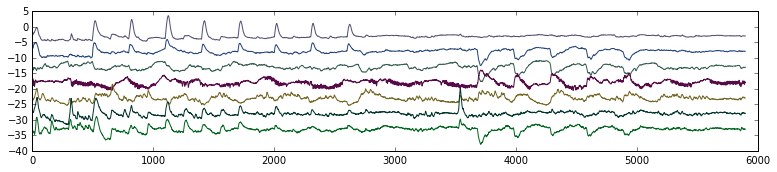

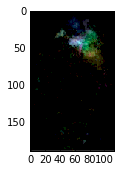

NO
66
nodulus


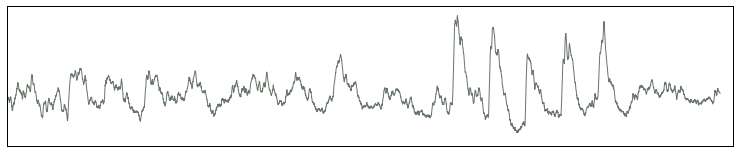

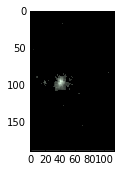

PB
124
PB
156
PB
160
PB
179
PB
211
protocerebral bridge


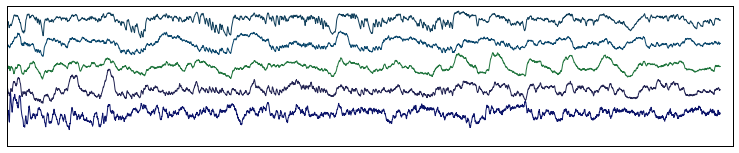

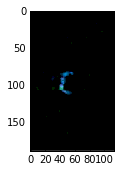

LH_R
AL_R
MB_CA_R
8
LH_R
MB_CA_R
76
LH_R
99
lateral horn


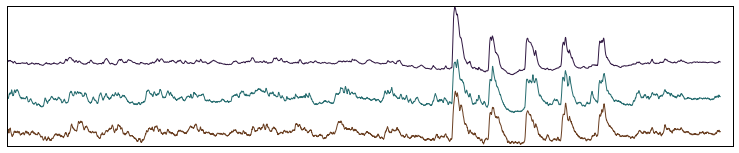

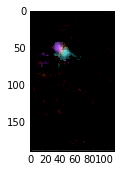

LAL_R
CRE_R
LAL_L
39
LAL_R
EPA_R
51
LAL_R
VES_R
EPA_R
78
lateral accessory lobe


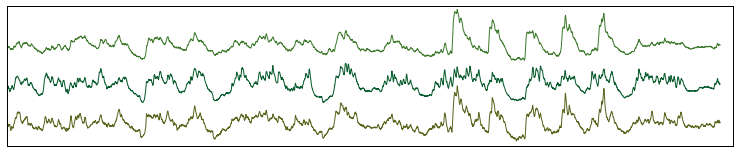

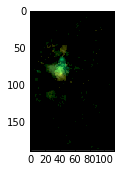

SAD
AMMC_R
GNG
29
SAD
GNG
45
SAD
139
SAD
CAN_L
164
saddle


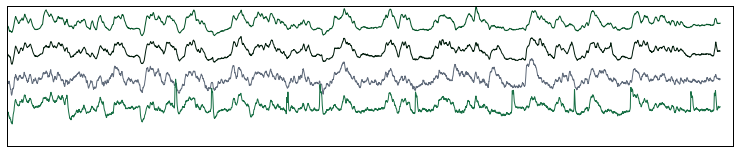

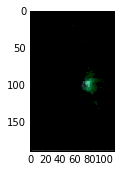

SAD
CAN_R
CAN_L
169
CAN_R
CRE_R
SPS_R
MB_VL_L
178
cantle


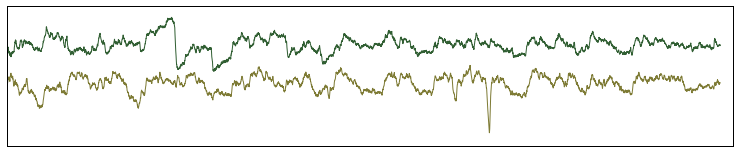

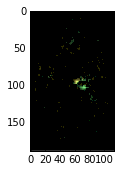

SAD
AMMC_R
IPS_R
GNG
10
AMMC_R
65
antennal mechanosensory and motor center


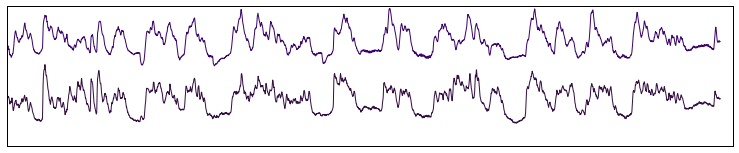

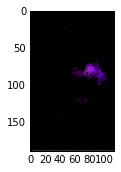

LAL_R
MB_PED_R
90
pedunculus of adult mushroom body


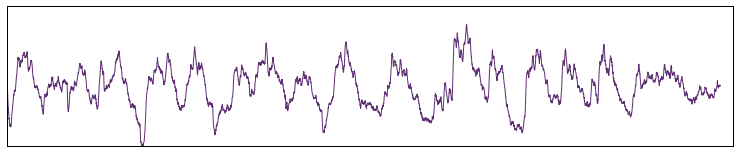

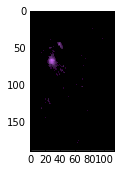

CRE_R
MB_VL_R
SIP_R
4
MB_VL_R
MB_ML_R
SIP_R
47
vertical lobe of adult mushroom body


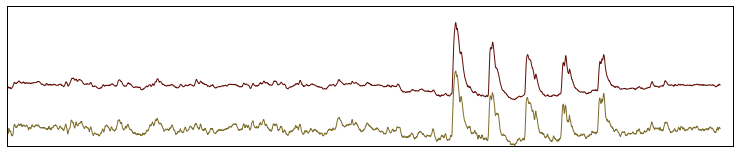

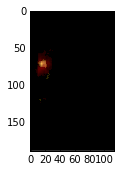

CRE_R
MB_PED_R
MB_VL_R
MB_ML_R
3
medial lobe of adult mushroom body


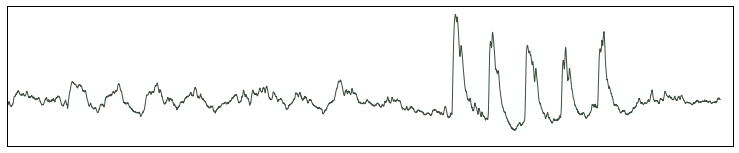

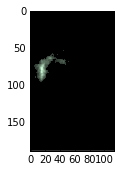

CAN_R
FLA_R
CAN_L
FLA_L
138
flange


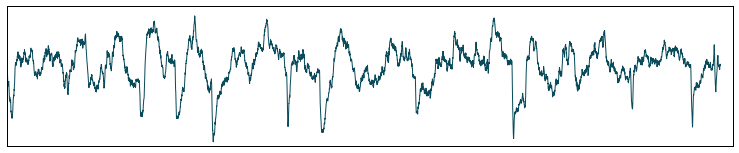

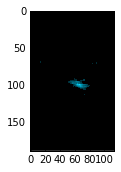

LOP_R
ME_R
136
lobula plate


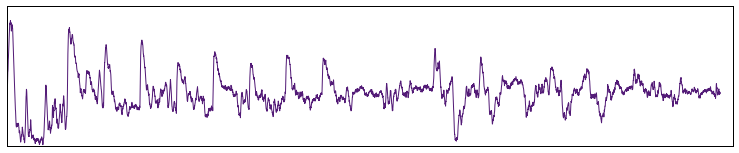

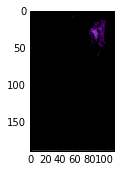

EB
AL_R
57
EB
116
ellipsoid body


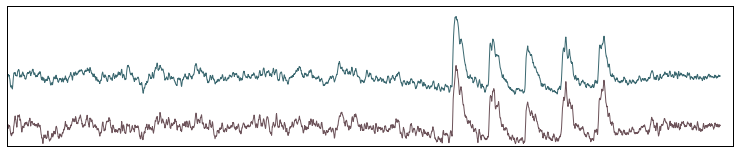

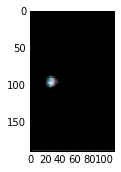

ME_R
9
LOP_R
ME_R
13
ME_R
SPS_R
14
ME_R
24
ME_R
41
ME_R
64
LO_R
ME_R
79
ME_R
107
medulla


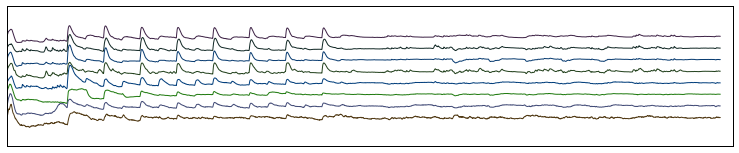

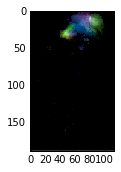

ATL_R
CRE_R
FB
44
NO
FB
46
FB
55
fan-shaped body


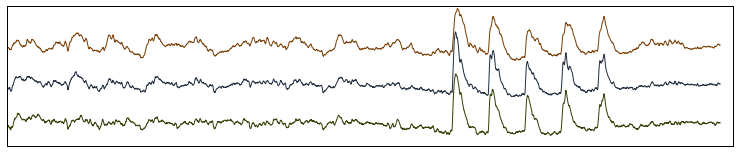

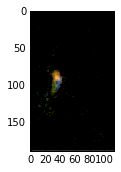

SLP_R
MB_CA_R
LAL_L
MB_CA_L
94
SLP_R
IPS_R
LAL_L
148
SLP_R
213
superior lateral protocerebrum


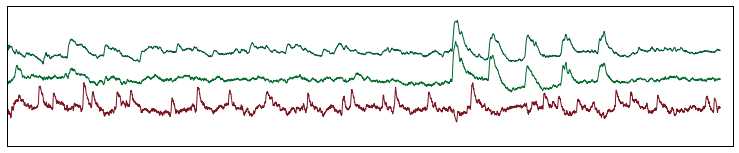

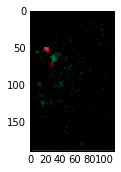

SMP_R
206
superior medial protocerebrum


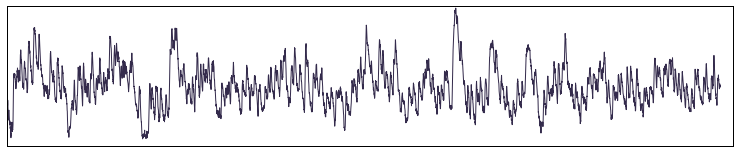

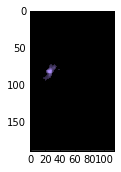

AVLP_R
PVLP_R
IVLP_R
20
LAL_R
AVLP_R
93
anterior ventrolateral protocerebrum


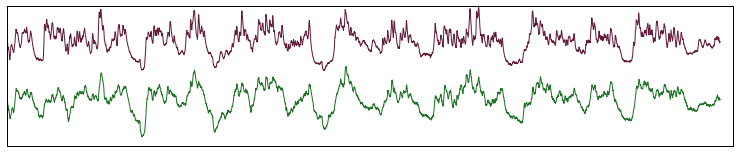

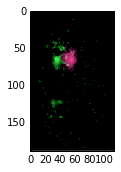

IVLP_R
17
IVLP_R
33
wedge


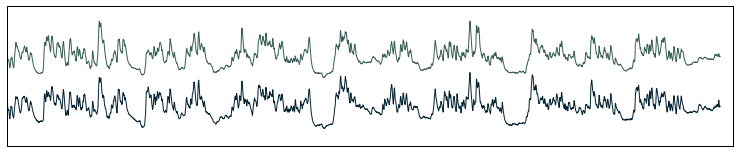

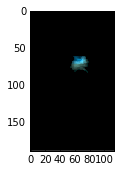

MB_PED_R
MB_CA_R
SCL_R
117
LH_R
MB_CA_R
118
MB_CA_R
209
calyx of adult mushroom body


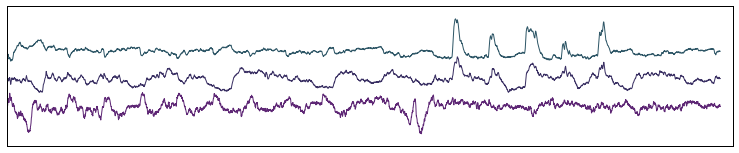

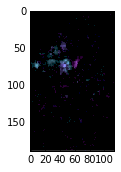

SPS_R
186
SPS_R
IPS_R
200
MB_VL_R
SPS_R
IPS_R
MB_PED_L
216
SPS_R
IPS_R
217
superior posterior slope


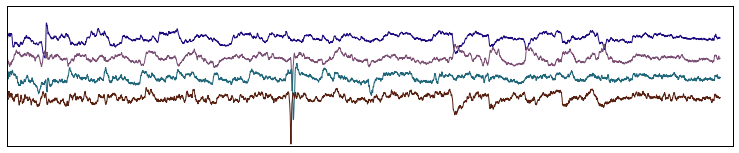

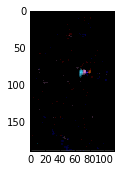

IVLP_R
PLP_R
SPS_R
IPS_R
38
IPS_R
170
MB_CA_R
IPS_R
CRE_L
208
inferior posterior slope


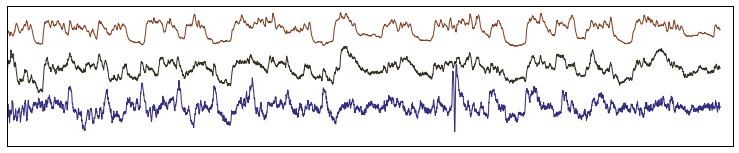

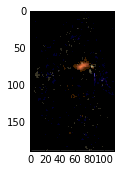

SAD
GNG
6
GNG
52
GNG
77
IPS_R
GNG
88
IPS_R
GNG
89
GNG
110
GNG
AMMC_L
131
IPS_R
GNG
132
GNG
155
GNG
159
IPS_R
GNG
181
GNG
185
IPS_R
GNG
190
GNG
196
IPS_R
GNG
GOR_L
204
adult gnathal ganglion


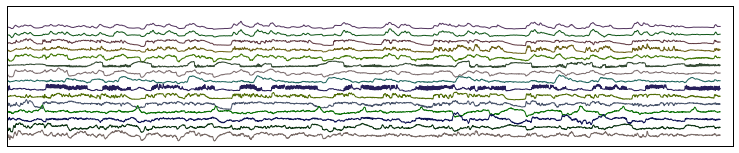

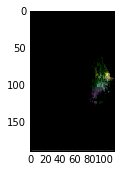

LO_L
ME_L
56
LO_L
92
LO_L
ME_L
100
LO_L
ME_L
119
LO_L
ME_L
128
LO_L
129
LO_L
137
LO_L
ME_L
150
lobula


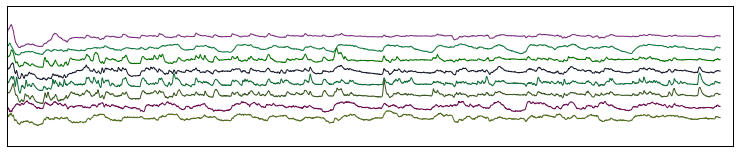

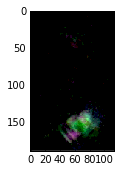

BU_L
LAL_L
67
bulb


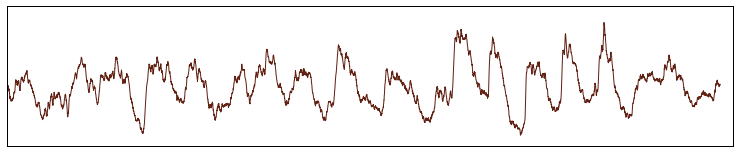

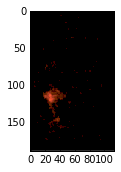

LH_R
LH_L
SCL_L
21
LH_L
LAL_L
MB_VL_L
27
LH_L
69
LH_L
108
LH_L
184
lateral horn


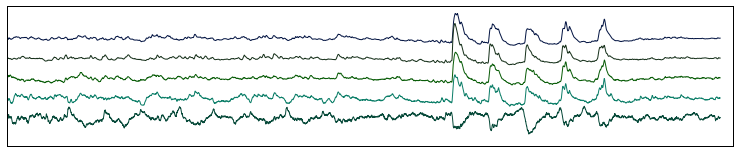

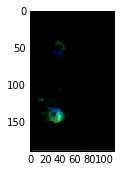

LAL_L
AVLP_L
IVLP_L
EPA_L
35
lateral accessory lobe


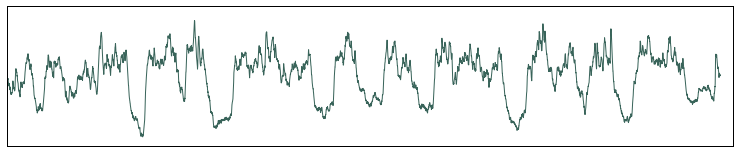

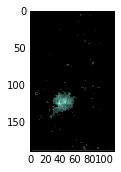

SPS_R
IPS_R
CAN_L
IPS_L
40
CAN_L
SMP_L
162
NO
CAN_L
IVLP_L
MB_CA_L
205
cantle


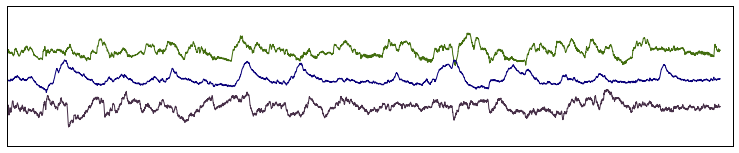

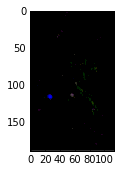

AMMC_L
IVLP_L
31
antennal mechanosensory and motor center


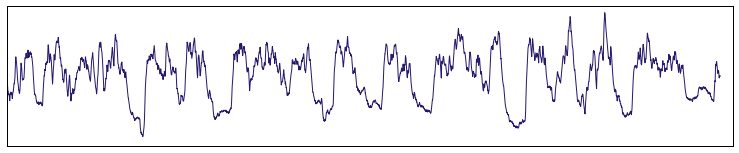

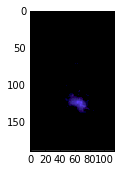

MB_PED_L
MB_VL_L
SCL_L
49
pedunculus of adult mushroom body


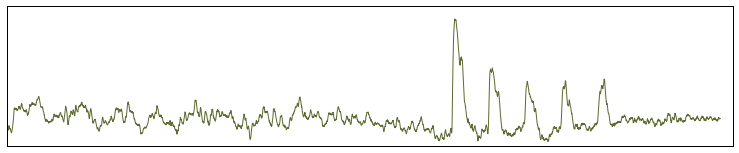

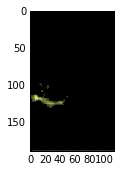

MB_VL_L
SIP_L
26
MB_VL_L
113
CRE_L
MB_VL_L
MB_CA_L
215
vertical lobe of adult mushroom body


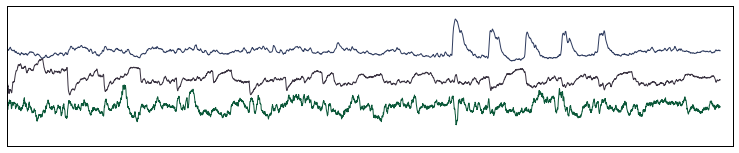

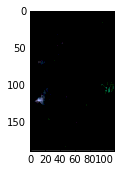

CRE_R
MB_ML_R
CRE_L
MB_ML_L
11
CRE_L
MB_PED_L
MB_ML_L
15
medial lobe of adult mushroom body


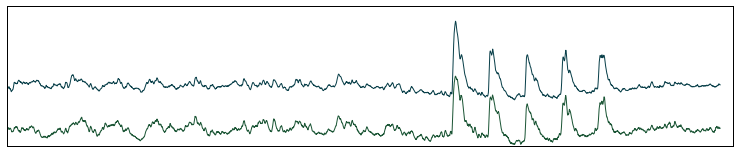

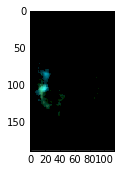

CAN_L
VES_L
FLA_L
42
flange


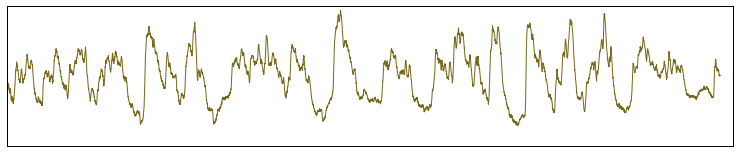

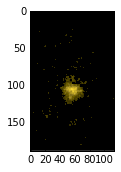

LO_L
LOP_L
130
lobula plate


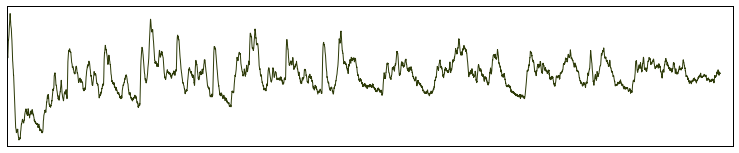

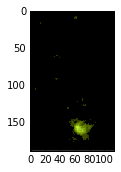

LH_L
AL_L
5
AL_R
AL_L
16
SPS_R
IPS_R
CAN_L
AL_L
168
adult antennal lobe


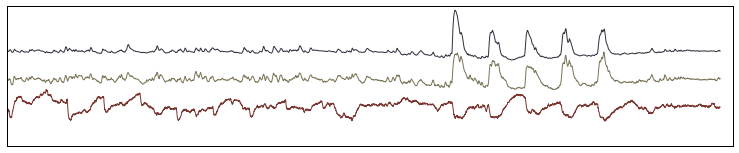

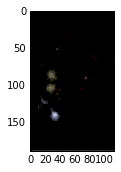

ME_L
2
ME_L
18
ME_R
ME_L
23
ME_R
LO_L
ME_L
25
LOP_L
ME_L
28
LOP_L
ME_L
30
ME_L
34
ME_L
43
LO_L
ME_L
48
ME_L
50
ME_L
61
ME_L
71
PB
ME_L
85
LOP_L
ME_L
111
medulla


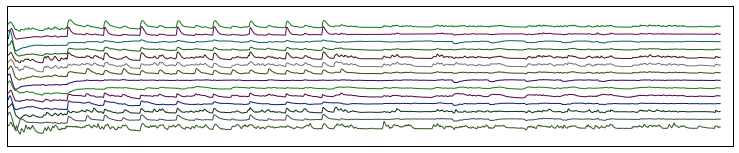

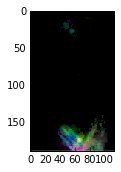

SLP_L
133
superior lateral protocerebrum


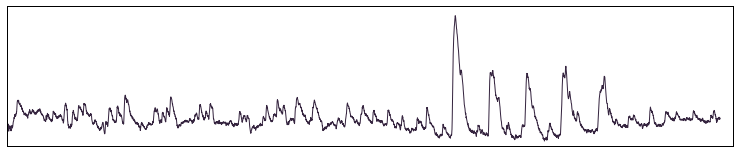

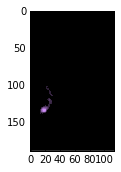

SIP_R
MB_VL_L
SIP_L
53
SPS_R
VES_L
IB_L
SIP_L
212
superior intermediate protocerebrum


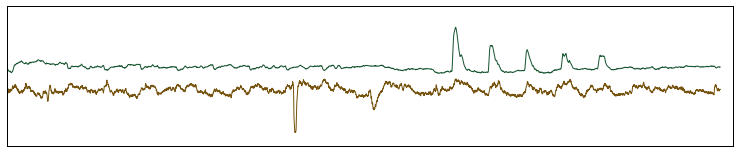

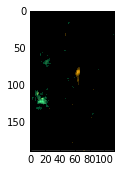

CRE_L
MB_ML_L
SMP_L
19
SMP_L
192
superior medial protocerebrum


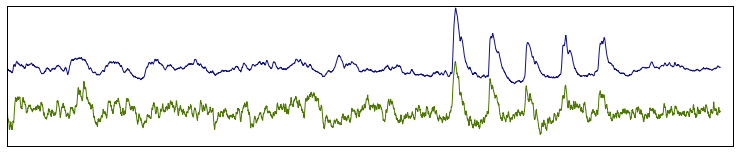

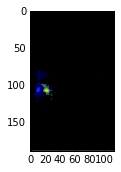

AVLP_R
AVLP_L
82
anterior ventrolateral protocerebrum


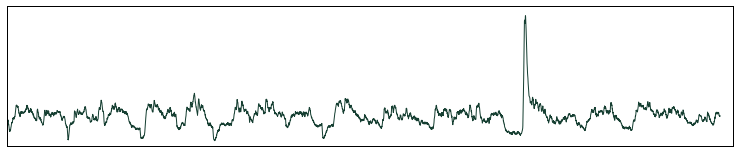

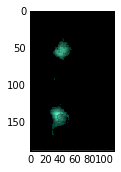

AVLP_L
PVLP_L
IVLP_L
96
posterior ventrolateral protocerebrum


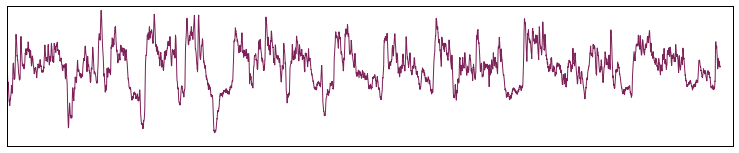

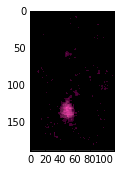

IVLP_L
54
SMP_R
IVLP_L
AOTU_L
IPS_L
161
wedge


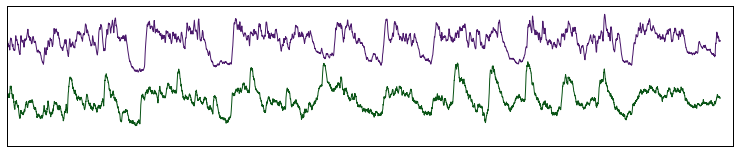

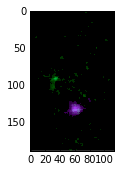

LH_L
LAL_L
PLP_L
MB_CA_L
86
posterior lateral protocerebrum


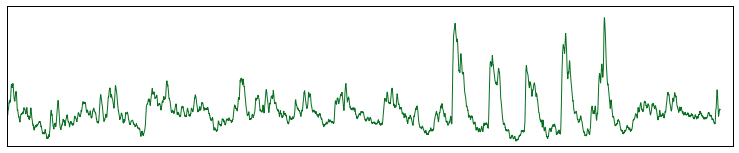

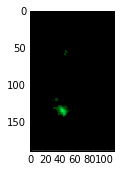

AL_R
MB_PED_L
MB_CA_L
7
MB_VL_L
PLP_L
MB_CA_L
SCL_L
62
AL_R
MB_PED_L
AL_L
MB_CA_L
81
MB_CA_L
87
MB_PED_L
AL_L
MB_CA_L
101
MB_CA_R
MB_CA_L
135
LAL_L
MB_CA_L
140
MB_CA_R
SPS_R
MB_CA_L
177
calyx of adult mushroom body


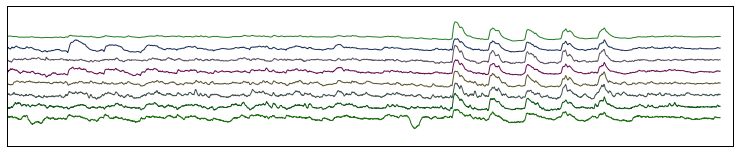

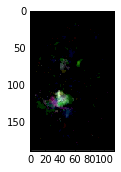

IPS_L
125
inferior posterior slope


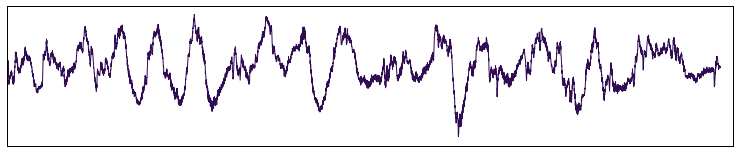

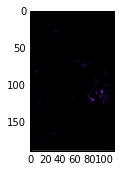

LH_R
EPA_L
214
epaulette


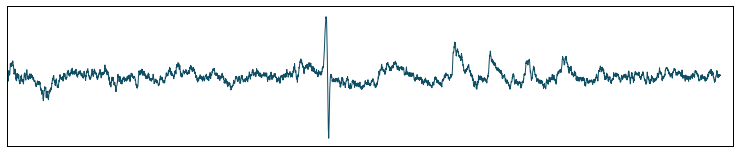

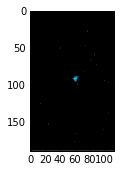

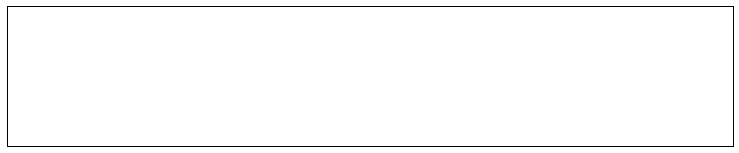

In [57]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [58]:
BadICs=[105,112,115,169,178,138,136,186,200,216,217,208,215,168,212,125,214]

In [59]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [60]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  5,  9, 10,
       11, 11, 12, 12, 12, 12, 12, 13, 13, 16, 16, 16, 16, 17, 17, 17, 17,
       17, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 23, 24, 24, 25, 25, 25, 25,
       25, 25, 25, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 31, 31,
       31, 32, 32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 37,
       42, 43, 43, 43, 45, 46, 46, 47, 47, 47, 47, 47, 47, 47, 48, 48, 49,
       49, 49, 51, 52, 52, 52, 53, 53, 53, 53, 58, 59, 60, 62, 62, 62, 62,
       62, 62, 63, 63, 63, 64, 64, 64, 64, 65, 65, 66, 66, 66, 66, 67, 67,
       68, 68, 68, 68, 68, 68, 69, 70, 72, 72, 72, 72, 72, 73, 73, 73, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74])

In [61]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [62]:
LargerRegionI

array([ 5,  3,  1,  5,  5,  4, 12,  5,  6,  1, 11,  5,  3,  1,  1,  5,  4,
        2,  1,  7,  2,  6,  2,  1,  1,  1,  5,  6,  1, 11,  1, 11,  9,  2,
        1,  9, 10,  7,  3,  9, 11,  1, 11,  1,  8, 11,  8,  5,  1,  5,  1,
        9, 12,  7,  2,  8,  1,  8,  2,  2, 10,  1,  5,  1,  1, 11,  8,  8,
        5,  6, 10,  1, 11,  1,  2,  1,  6, 12,  9,  1,  1,  5,  2,  7,  1,
        1,  2,  5, 12, 12,  5,  5,  1,  2,  7,  5,  2,  3,  2,  6,  1,  5,
        8,  1,  2,  5,  1,  1,  6,  1, 12,  1,  1,  5,  7,  1,  8,  5,  5,
        1,  5,  5, 12,  3,  8,  3,  2,  1,  1,  1,  1, 12, 12,  7, 11,  5,
        1,  1, 11, 11,  5,  1,  5,  5,  3,  1,  7, 10,  7,  5,  1,  9, 11,
       11,  1, 12,  8,  1, 11, 12,  8,  2, 11, 12, 11,  7,  7,  2,  4, 11,
        3,  7,  9,  5, 12,  5,  2,  5, 11,  8,  7, 12,  4,  3,  6, 12,  3,
       11,  5,  1, 12, 10,  7, 11,  8,  5, 12, 12,  3,  1,  3,  5,  5,  3,
       12, 11,  7,  2,  3,  5,  8,  8,  7,  7,  3,  5,  3,  3,  2, 11,  3,
       10])

In [63]:
GoodICAnat

array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0

OL
2
9
13
14
18
23
24
25
28
30
34
41
43
48
50
56
61
64
71
75
79
84
85
92
100
103
107
111
119
128
129
130
137
150
154
157


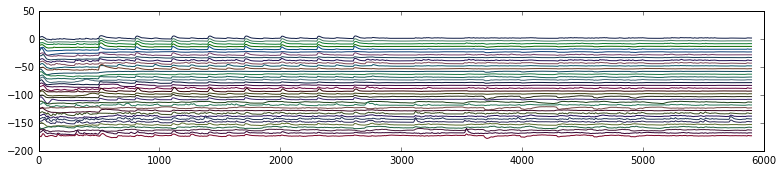

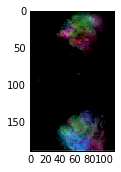

VLNP
17
20
33
54
82
86
93
96
161


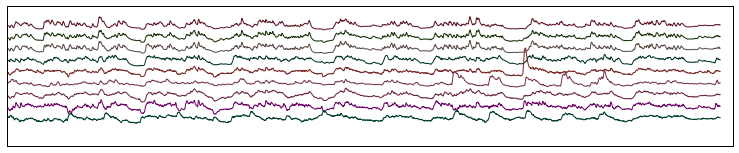

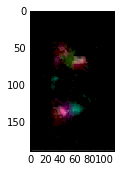

VMNP
38
170


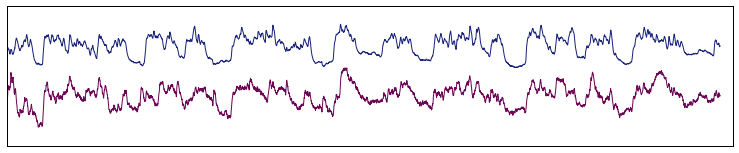

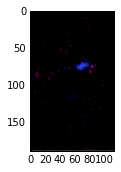

AL
5
16


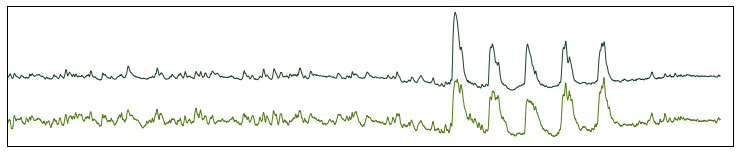

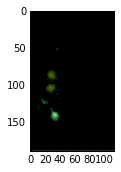

MB
3
4
7
11
15
26
47
49
62
81
87
90
101
113
117
118
135
140
177
209


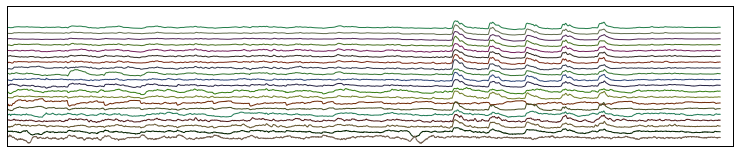

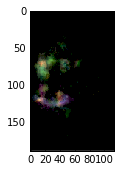

LH
8
21
27
69
76
99
108
184


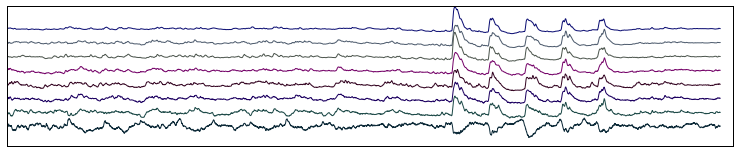

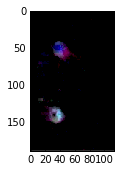

SNP
19
53
94
133
148
192
206
213


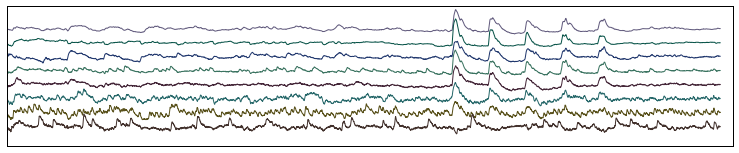

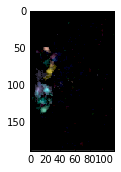

CX
44
46
55
57
66
67
116
124
156
160
179
211


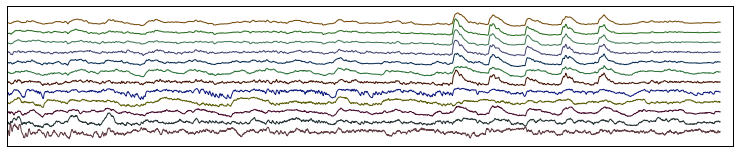

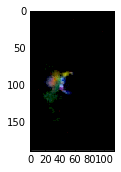

LX
35
39
51
78


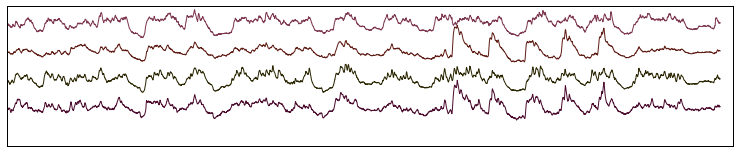

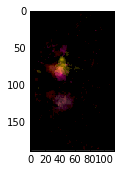

INP
PENP
10
29
31
40
42
45
65
139
162
164
205


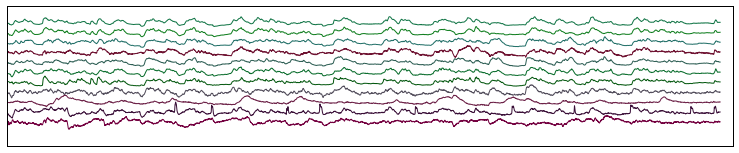

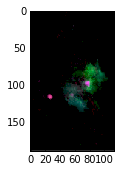

GNG
6
52
77
88
89
110
131
132
155
159
181
185
190
196
204


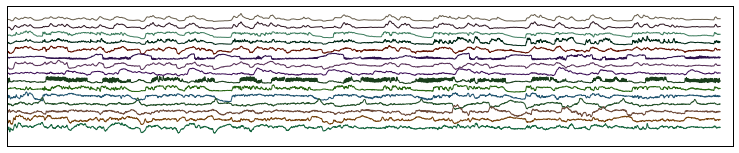

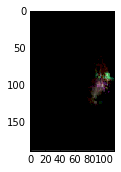

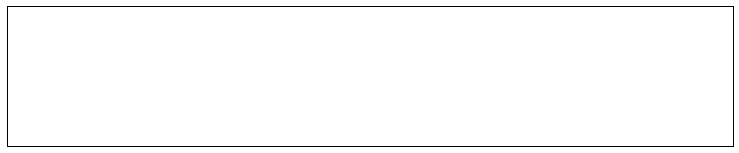

In [64]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [65]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)